Visualisation of loc data

In [1]:
# import libraries
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [4]:
#define relevant columns
columns = ['test_accuracy','training_accuracy']

#initialise empty dataframes
accuracy = pd.DataFrame(columns=['Batchsize', 'Training', 'Test'])

bs128 =  []
bs8 = []
bs32 = []
bs512 = []
files= []
folders = []

#Get all folders of Cifar10
for r, d, f in os.walk(os.getcwd()+ "\logs"):
    for folder in d:
        name = str(folder)
        if name.endswith('Cifar10'):     
            folders.append(os.path.join(r, folder))


# go through Cifar10
for fil in folders:
    
    direction = str(fil)
    inhalt = os.listdir(fil) #each file in each folder

    #seperate the csv files according to batch size
    for file in inhalt:
    
        name = str(file)
       
        if ('bs128' in name):
            a+=1
            bs128.append(pd.read_csv(direction + '/' + name ,sep= ';',usecols=columns))
            df_concatenated128 = pd.concat(bs128, ignore_index=True)

        if ('bs8' in name):

            bs8.append(pd.read_csv(direction + '/' + name ,sep= ';',usecols=columns))
            df_concatenated8 = pd.concat(bs8, ignore_index=True)

        if ('bs32' in name):

            bs32.append(pd.read_csv(direction + '/' + name ,sep= ';',usecols=columns))
            df_concatenated32 = pd.concat(bs32, ignore_index=True)

        if ('bs512' in name):

            bs512.append(pd.read_csv(direction + '/' + name ,sep= ';',usecols=columns))
            df_concatenated512 = pd.concat(bs512, ignore_index=True)
        
    
        
        
#add the gained information in the accuracy dataframe        
add8 = pd.DataFrame([[8,df_concatenated8['training_accuracy'].mean(),df_concatenated8['test_accuracy'].mean()]], columns=['Batchsize', 'Training', 'Test'])
accuracy =accuracy.append(add8, ignore_index=True)
add32 = pd.DataFrame([[32,df_concatenated32['training_accuracy'].mean(),df_concatenated32['test_accuracy'].mean()]], columns=['Batchsize', 'Training', 'Test'])
accuracy =accuracy.append(add32, ignore_index=True)
add128 = pd.DataFrame([[128,df_concatenated128['training_accuracy'].mean(),df_concatenated128['test_accuracy'].mean()]], columns=['Batchsize', 'Training', 'Test'])
accuracy =accuracy.append(add128, ignore_index=True)
add512 = pd.DataFrame([[512,df_concatenated512['training_accuracy'].mean(),df_concatenated512['test_accuracy'].mean()]], columns=['Batchsize', 'Training', 'Test'])
accuracy =accuracy.append(add512, ignore_index=True)
    
print(accuracy)

C:\Users\vivia\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\vivia\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\vivia\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\vivi

  Batchsize  Training      Test
0         8  0.649417  0.689836
1        32  0.689849  0.716661
2       128  0.651929  0.666007
3       512  0.571346  0.581849


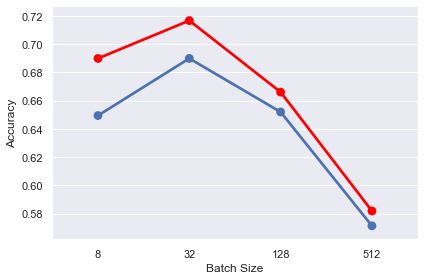

In [3]:
#Plot accuracy

# create two axes
fig = plt.figure()


# first subplot with boxplot
ax = sns.pointplot(x="Batchsize", y="Training", data=accuracy)
 

# second subplot with violinplot
ax2= sns.pointplot(x="Batchsize", y="Test", data=accuracy, color= 'red')#
#handling legends
ax.set(xlabel='Batch Size', ylabel='Accuracy')

fig.tight_layout()